# Проектная работа "Исследования рынка заведений общественного питания Москвы"

# ВВЕДЕНИЕ

Инвесторы из фонда «Shut Up and Take My Money» решили попробовать себя в новой области и открыть заведение общественного питания в Москве. Заказчики ещё не знают, что это будет за место: кафе, ресторан, пиццерия, паб или бар, — и какими будут расположение, меню и цены.
Для начала они просят вас — аналитика — подготовить исследование рынка Москвы, найти интересные особенности и презентовать полученные результаты, которые в будущем помогут в выборе подходящего инвесторам места.
Вам доступен датасет с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Информация, размещённая в сервисе Яндекс Бизнес, могла быть добавлена пользователями или найдена в общедоступных источниках. Она носит исключительно справочный характер.

## Цели и задачи

Цель данного проекта  - подготовить исследование рынка заведений общественного питания Москвы для фонда «Shut Up and Take My Money» (далее "Инвестор"), необходимо интересные особенности и презентовать полученные результаты, которые в будущем помогут Инвестору в выборе подходящего места для открытия своего заведения. Основной замысел Инвесторов - открыть крутую и доступную кофейню, как «Central Perk» из серияла "Друзья".

Исходя из поставленной цели сформулируем задачи для выполнения:
1. Провести предобработку даннных, на которых будет построен анализ;
2. Проанализировать сегментацию рынка заведений Москвы по видам и ценовым категориям;
3. Выполнить расчеты и анализ размера среднего чека заведений в различных категориях;
4. Провести анализ вместимости заведений по категориям, а также распределение заведений по административным округам столицы.
5. Отдельно выполнить анализ по сегменту "кофейни", составить рекомендации для Инвесторов в части месторасположения и "параметров" заведения, планируемого к открытию.

Для проведения анализа доступен датасет с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Содержание датасета:
- name — название заведения;
- address — адрес заведения;
- category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- hours — информация о днях и часах работы;
- lat — широта географической точки, в которой находится заведение;
- lng — долгота географической точки, в которой находится заведение;
- rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона;
- middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
- middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
- chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым;
- district — административный район, в котором находится заведение, например Центральный административный округ;
- seats — количество посадочных мест.


## Знакомство с данными
Импортируем библиотеки, которые будут использоваться в проектной работе, в отдельном блоке.

In [119]:
import pandas as pd
import re
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from folium import Map, Choropleth
from folium import Map, Marker
from folium.plugins import MarkerCluster

Загрузим датасет и посмотрим общую информацию о нём.

In [120]:
try:
    df = pd.read_csv('C:/Users/sutul/datasets/moscow_places.csv')
except:
    df = pd.read_csv('/datasets/moscow_places.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


В датасете 8406 записей о ресторанах/кафе Москвы. Информация поделена на 14 столбцов, есть пропуски в столбцах hours, price, avg_bill, middle_avg_bill, middle_coffee_cup и seats. Типы данных представлены object, float и int. Посмотрим на таблицу.

In [121]:
display(df.head())
pd.set_option('display.max_columns', None)

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0


Изменение типов данных значений в столбцах датасета требуется только для столбца 'seats', в остальном численным значениям соответствует тип float или int, текстовым - object. Посмотрим на распределение численных данных.

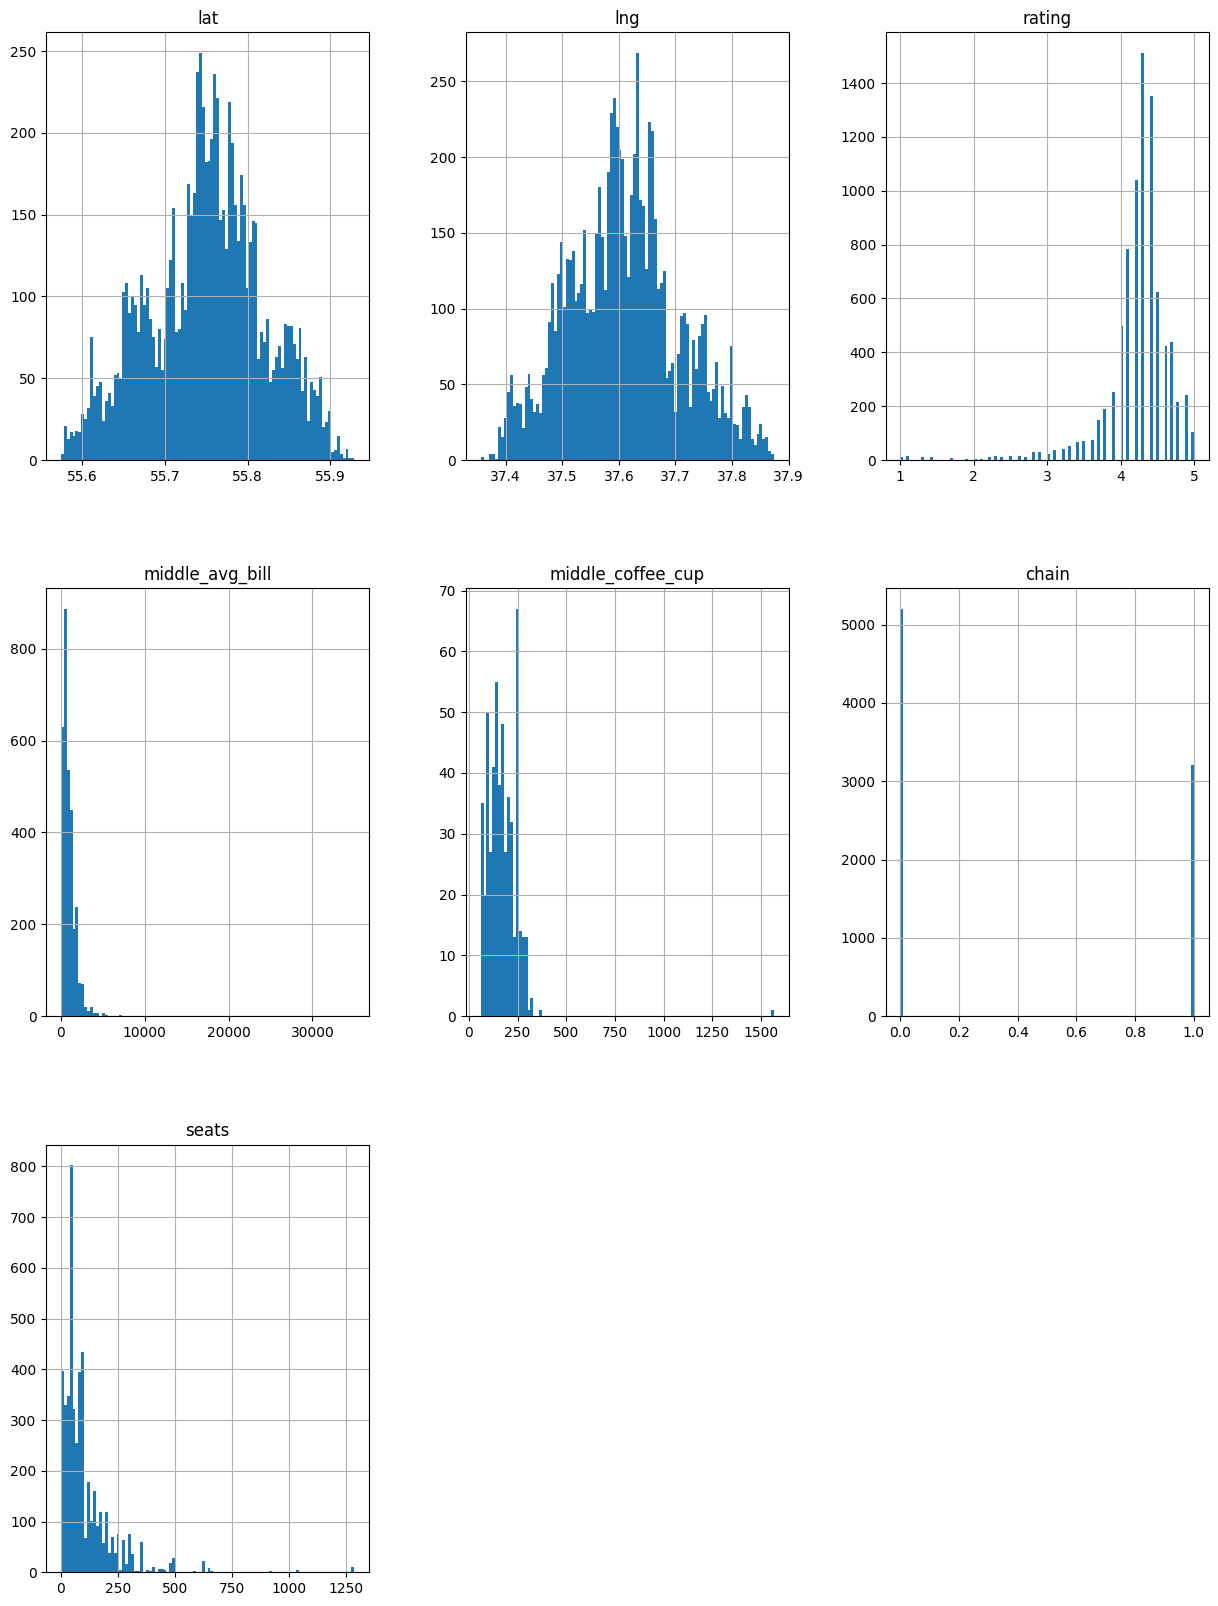

In [122]:
df.hist(figsize=(15, 20), bins=100);

Столбцы 'middle_avg_bill', middle_cofee_cup и seats явно содержат аномальные значения. Аномальные значения обработаем в разделе "Предобработка данных".

## Предобработка данных
### Дубликаты

In [123]:
print('явных дубликатов -', df.duplicated().sum())

явных дубликатов - 0


Посмотрим на возможные строки с одинаковыми названиями и адресами заведений.

In [124]:
(
df.pivot_table(values='rating', index={'address', 'name'}, aggfunc='count').
sort_values(by='rating', ascending=False).query('rating > 1').count()
)

rating    0
dtype: int64

Таких строк не найдено.
Проверим датасет на неявные дубликаты. Уникальным идентификатором заведения могут являться координаты, а также адрес.

In [125]:
duplicates = (
df.pivot_table(values='name', index={'address', 'lat', 'lng'}, aggfunc='count').
sort_values(by='name', ascending=False).query('name > 1').reset_index()
)
print('потенциальных неявных дубликатов - ', duplicates['name'].sum())

потенциальных неявных дубликатов -  60


60 потенциальных неявных дубликата, необходимо посмотреть на названия данных заведений, т.к. они могут просто находиться на разных этажах общих зданий. Для этого отфильтруем основной датасет по данным, полученным в вышеуказанной сводной таблице. 

In [126]:
df.query('address in @duplicates["address"] & lng in @duplicates["lng"] & lat in @duplicates["lat"]')['name']

121                                 Встреча
182                                 Карелия
271                                   Алали
273                                Pho Oanh
348                                Meat Лав
662                       Family Cafe Mayak
1071                                   Кафе
1074                    Халяль Кафе-Пекарня
1324               Кафе-кулинария Сикварули
1430                              More poke
1452                              Сикварули
1511                              More Poke
1792                  Бансонс Бургер Китчен
2007                          Лепим и Варим
2719                      Dragon bubble tea
2866                    Dragon Mixology Bar
2939                          Прошу к столу
2951                        Georgian Garden
2974                             Позы&Буузы
3001                             Хинкальная
3520                                    Ava
3715                             Чайхона №1
3759                            

В целом названия заведений различные, но есть и несколько неявных дубликатов:
- "Море Poke" встречается 2 раза;
- "Леон" и "Leon".

In [127]:
df = df.drop(labels={1511, 5314}).reset_index(drop=True)
display(df.query('address in @duplicates["address"] & lng in @duplicates["lng"] & lat in @duplicates["lat"]')['name'])

121                                 Встреча
182                                 Карелия
271                                   Алали
273                                Pho Oanh
348                                Meat Лав
662                       Family Cafe Mayak
1071                                   Кафе
1074                    Халяль Кафе-Пекарня
1324               Кафе-кулинария Сикварули
1430                              More poke
1452                              Сикварули
1791                  Бансонс Бургер Китчен
2006                          Лепим и Варим
2718                      Dragon bubble tea
2865                    Dragon Mixology Bar
2938                          Прошу к столу
2950                        Georgian Garden
2973                             Позы&Буузы
3000                             Хинкальная
3519                                    Ava
3714                             Чайхона №1
3758                                Patriki
4055                          St

Среди названий заведений присутствует "Кафе". Вероятно, что данное наименование присвоено заведениям, название которых осталось неизвестным. Посмотрим на уникальные названия заведений.

In [128]:
df['name'].value_counts().head(20)

Кафе                                   189
Шоколадница                            120
Домино'с Пицца                          76
Додо Пицца                              74
One Price Coffee                        71
Яндекс Лавка                            69
Cofix                                   65
Prime                                   50
Хинкальная                              44
Шаурма                                  43
КОФЕПОРТ                                42
Кулинарная лавка братьев Караваевых     39
Теремок                                 38
Чайхана                                 37
Ресторан                                34
CofeFest                                32
Буханка                                 32
Столовая                                28
Му-Му                                   27
Drive Café                              24
Name: name, dtype: int64

Проверим к каким категориям относятся "Кафе", "Яндекс Лавка" и "Ресторан".

In [129]:
names = ['Кафе', 'Ресторан', 'Кофейня', 'Пиццерия', 'Бар,паб',
       'Быстрое питание', 'Булочная', 'Столовая']
(
df.pivot_table(values='address', index={'category', 'name'}, aggfunc='count').
    query('name in @names | name == "Яндекс Лавка"')
)

address
name            category                
Булочная        булочная               1
Быстрое питание быстрое питание        2
                кофейня                1
Кафе            бар,паб                2
                быстрое питание        7
                кафе                 159
                кофейня                6
                пиццерия               1
                ресторан               8
                столовая               6
Кофейня         кафе                   3
                кофейня                9
Пиццерия        кафе                   1
                пиццерия               1
                ресторан               1
Ресторан        пиццерия               1
                ресторан              33
Столовая        кафе                   6
                столовая              22
Яндекс Лавка    ресторан              69

Целая куча заведений различных категорий с названием "Кафе", "Кофейня" и т.д., 69 ресторанов "Яндекс Лавка" и 34 "Ресторана", один из которых пиццерия.
Как мы знаем "Яндекс Лавка" это сервис по заказу продуктов, таким образом участвовать в анализе заведений общественного питания он не должен.
Заведения, у которых название схоже с категорией явно не отсносятся к одноименным сетям, далее будем позиционировать данные заведения как самостоятельные единицы. Приведем категории данных заведений к названию.

In [130]:
category_cor = []
for row in df.itertuples():
    if row[1] in names:
        category_cor.append(row[1].lower())
    else:
        category_cor.append(row[2])
df['category'] = category_cor
(
df.pivot_table(values='address', index={'category', 'name'}, aggfunc='count').
    query('name in @names | name == "Яндекс Лавка"')
)

,,address
name,category,
Булочная,булочная,1
Быстрое питание,быстрое питание,3
Кафе,кафе,189
Кофейня,кофейня,12
Пиццерия,пиццерия,3
Ресторан,ресторан,34
Столовая,столовая,28
Яндекс Лавка,ресторан,69


Категории заведений отредактированы. Не забудем удалить "Яндекс Лавку".

In [131]:
yandex_list = df.query('name == "Яндекс Лавка"').index
df = df.drop(index=yandex_list).reset_index(drop=True)

Проверим также наименование категориальных значений в столбцах 'category', 'district', 'price'.

In [132]:
df['category'].unique()

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

In [133]:
df['district'].unique()

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

In [134]:
df['price'].unique()

array([nan, 'выше среднего', 'средние', 'высокие', 'низкие'], dtype=object)

Наименования категориальных значений указаных корректно.


### Обработка пропусков

In [135]:
df.isna().sum()

name                    0
category                0
address                 0
district                0
hours                 535
lat                     0
lng                     0
rating                  0
price                5020
avg_bill             4519
middle_avg_bill      5186
middle_coffee_cup    7800
chain                   0
seats                3576
dtype: int64

- пропуски в столбце hours можно заполнить медианными значениями, однако подсчитать их будет не просто, т.к. потребуется извлечь из текстовой информации различного формата численные значения и добавить новые столбцы, т.к. не все заведения работают в одинаковом графике все семь дней недели;
- часть пропусков в столбце price можно заполнить по значениям в столбцах avg_bill и middle_avg_bill, оставшиеся пропуски, если их останется немного, можно будет удалить, в противном случае пропуски придется оставить, т.к. сведения о рейтинге заведения могут пригодиться при рассмотрении вопроса о выборе местоположения нового заведения;
- пропуски в столбце avg_bill можно частично заполнить орентируясь на категориальные данные из столбца price, там, где они присутствуют, пропуски при этом можно заполнить медианными значениями для определенной категории, в остальном,   и на основании данных последнего, при этом пропуски в столбце пропуски, если их останется немного, можно будет удалить, в противном случае пропуски придется оставить, чтобы не снижать репрезентативность выборки данных;
- исходя из описания столбцов датасета middle_avg_bill — это число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт», а middle_coffee_cup — это число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино», таким образом пропуски придется оставить;
- пропуски в столбце seats не получится заполнить медианными значениями, т.к. нет никакой косвенной информации, указывающей на размер заведения, поэтому данные пропуски, по причине их значительного количества придется оставить.

#### пропуски в столбце "hours"

Посмотрим количество уникальных наименований в столбце, чтобы оценить возможность заполнения пропусков медианными значениями.

In [136]:
df['hours'].value_counts()

ежедневно, 10:00–22:00                                  759
ежедневно, круглосуточно                                722
ежедневно, 11:00–23:00                                  396
ежедневно, 10:00–23:00                                  310
ежедневно, 12:00–00:00                                  254
                                                       ... 
пн 13:00–00:00; вт-вс 10:00–00:00                         1
пн-пт 11:30–14:30                                         1
пн-ср 12:00–03:00; чт-сб 12:00–06:00; вс 12:00–03:00      1
пн-сб 08:30–20:00; вс 09:00–19:00                         1
пн-чт 12:00–00:00; пт 12:00–03:00; сб,вс 12:00–00:00      1
Name: hours, Length: 1306, dtype: int64

Количество уникальных значений слишком велико (1306 вариантов), чтобы приводить их к единообразию и пытаться рассчитать медиану. Добавим столбец is_24/7 с обозначением, что заведение работает ежедневно и круглосуточно (24/7). Пропуски оставим ввиду их малого количества по отношению к общему количеству строк в датасете.

In [137]:
df['is_24/7'] = df['hours'].isin(['ежедневно, круглосуточно'])
display(df['is_24/7'])

0       False
1       False
2       False
3       False
4       False
        ...  
8330    False
8331    False
8332     True
8333     True
8334     True
Name: is_24/7, Length: 8335, dtype: bool

Также добавим столбец street из столбца с адресом.

In [138]:
spltd_address = df['address'].str.split(pat=r',', expand=True, n=2)
spltd_address.columns = ['city', 'street', 'number']
print(spltd_address)

        city                    street         number
0     Москва             улица Дыбенко            7/1
1     Москва             улица Дыбенко    36, корп. 1
2     Москва        Клязьминская улица             15
3     Москва   улица Маршала Федоренко             12
4     Москва       Правобережная улица             1Б
...      ...                       ...            ...
8330  Москва         Профсоюзная улица             56
8331  Москва     Пролетарский проспект    19, корп. 1
8332  Москва          Люблинская улица   112А, стр. 1
8333  Москва          Люблинская улица   112А, стр. 1
8334  Москва       Россошанский проезд              6

[8335 rows x 3 columns]


Проверим, улица в данном случае всегда идет после первой запятой или нет.

In [139]:
wrong_streets = []
for i in spltd_address['street']:
    if re.search(r'\d', i) is not None:
        wrong_streets.append(i)
print(wrong_streets)

[' Проектируемый проезд № 5265', ' улица 800-летия Москвы', ' 3-й Лихачёвский переулок', ' 3-й Михалковский переулок', ' Коптевский бульвар д 18 А стр 1', ' 3-й Нижнелихоборский проезд', ' 3-й Нижнелихоборский проезд', ' 3-й Нижнелихоборский проезд', ' 1-я Останкинская улица', ' 3-й Нижнелихоборский проезд', ' 3-й Новомихалковский проезд', ' 1-я Останкинская улица', ' 1-я улица Леонова', ' 1-я улица Леонова', ' 1-я Останкинская улица', ' 2-я Мякининская улица', ' 4-я линия Хорошёвского Серебряного Бора', ' 4-я линия Хорошёвского Серебряного Бора', ' 4-я линия Хорошёвского Серебряного Бора', ' 4-я линия Хорошёвского Серебряного Бора', ' 2-я Мякининская улица', ' 1-й Волоколамский проезд', ' 1-й Волоколамский проезд', ' 3-я Радиаторская улица', ' 1-й Волоколамский проезд', ' 3-я Хорошёвская улица', ' 1-й Балтийский переулок', ' 3-я Хорошёвская улица', ' 2-й Войковский проезд', ' 3-я Хорошёвская улица', ' 2-я Песчаная улица', ' 3-я Хорошёвская улица', ' 2-й Балтийский переулок', ' 3-я Хор

Способ разделения на столбцы корректный для данного случая.


In [140]:
df['street'] = spltd_address['street']

#### пропуски в столбце "price"


Определим, сколько пропусков мы можем заполнить на основании столбцов avg_bill и middle_avg_bill.

In [141]:
print('только по столбцу avg_bill можно заполнить -', len(df.query('price.isna() & avg_bill.notna()')))

только по столбцу avg_bill можно заполнить - 743


In [142]:
print('только по столбцу middle_avg_bill можно заполнить -', len(df.query('price.isna() & middle_avg_bill.notna()')))

только по столбцу middle_avg_bill можно заполнить - 470


По столбцу avg_bill можно заполнить 743 пропуска, для этого неообходимо определить диапазон цен, которые присвоены категориям заведений.

In [143]:
# возможно есть более "красивый метод", но я его не нашел
# удалим все ненужные цифры и символы для столбца 'avg_bill'
spltd = (df['avg_bill'].str.replace(r'[А-я]', '').str.replace('ё', '').
         str.replace(':', '').str.replace(' ₽', '').str.replace(' ', ''))
# разделим датафрейм на два по символу "-"
spltd = spltd.str.split(pat=r'–', expand=True, n=1)
# дадим имена созданным столбцам
spltd.columns = ['from', 'to']
# создадим столбец со средним значением
spltd = spltd.astype('float')
spltd['avg'] = (spltd['from'] + spltd['to']) / 2
spltd['avg'] = spltd['avg'].fillna(spltd['from'])
print(spltd)

        from      to     avg
0        NaN     NaN     NaN
1     1500.0  1600.0  1550.0
2     1000.0     NaN  1000.0
3      155.0   185.0   170.0
4      400.0   600.0   500.0
...      ...     ...     ...
8330     NaN     NaN     NaN
8331     NaN     NaN     NaN
8332   150.0     NaN   150.0
8333     NaN     NaN     NaN
8334     NaN     NaN     NaN

[8335 rows x 3 columns]


C:\Users\sutul\AppData\Local\Temp\ipykernel_19704\814947974.py:3: FutureWarning:

The default value of regex will change from True to False in a future version.



Добавим столбец со средним чеком с дополненными даннными в основной датасет. Проверим диапазоны, по которым присвоены категории заведениям в столбце price по столбцу middle_avg_bill.

In [144]:
df['middle_avg_bill_cor'] = spltd['avg']
df_strip = df.query('price.notna() & middle_avg_bill_cor < 10000')
fig = px.strip(df_strip, x="category", y="middle_avg_bill_cor", color="price")
fig.update_layout(
    title='Распределение значений по средней величине заказа по категориям заведений',
    width=1100,
    height=700,
    showlegend=True,
    legend_font_size=15,
    legend_title_text='Ценовые категории:',
    legend_itemsizing='constant',
    plot_bgcolor='white'
)
fig.update_traces(boxpoints='all',
            jitter=0.8,
            marker_size=3)
fig.update_xaxes(title_text='Категория заведений')
fig.update_yaxes(title_text='Средняя величина заказа', gridcolor='silver')
fig.show()

Присвоение категорий заведений в столбце price имеет весьма условное разделение, заведения могут относиться к двум категориям одновременно, либо категории присвоены ошибочно. На диаграмме рассеяния отсутствуют явные границы ценовых категорий.
Для последующего возможного использования добавим столбец с откорректированным разделением заведений на категории, а также с дополненными данными в местах пропусков по имеющимся значениям в столбце middle_avg_bill_cor.

Разделим категории заведений по следующим границам:
- бар,паб: низкие <200 руб, средние 200-1000 руб, выше среднего 1000-2500 руб, высокие >2500 руб;
- булочная: низкие <200 руб, средние 200-1000 руб, выше среднего 1000-1500 руб, высокие >1500 руб;
- быстрое питание: низкие <200 руб, средние 200-1000 руб, выше среднего 1000-1500 руб, высокие >2500 руб;
- кафе: низкие <500 руб, средние 500-1500 руб, выше среднего 1500-2000 руб, высокие >2000 руб;
- кофейня: низкие <300 руб, средние 300-1000 руб, выше среднего 1000-2000 руб, высокие >2000 руб;
- пиццерия: низкие <300 руб, средние 300-1000 руб, выше среднего 1000-2000 руб, высокие >2000 руб;
- ресторан: низкие <500 руб, средние 500-1500 руб, выше среднего 1500-3000 руб, высокие >3000 руб;
- столовая: низкие <300 руб, средние 300-1000 руб, выше среднего 1000-1500 руб, высокие >1500 руб.

In [145]:
price_cor = []
category = 2
avg_bill = 17
price = 9
for row in df.itertuples():
    if row[category] =='бар,паб' and row[avg_bill] > 0:
        if row[avg_bill] <= 200:
            price_cor.append('низкие')
        elif row[avg_bill] > 200 and row[avg_bill] <= 1000:
            price_cor.append('средние')
        elif row[avg_bill] > 1000 and row[avg_bill] <= 2500:
            price_cor.append('выше среднего')
        elif row[avg_bill] > 2500:
            price_cor.append('высокие')
    elif row[category] =='булочная' and row[avg_bill] > 0:
        if row[avg_bill] <= 200:
            price_cor.append('низкие')
        elif row[avg_bill] > 200 and row[avg_bill] <= 1000:
            price_cor.append('средние')
        elif row[avg_bill] > 1000 and row[avg_bill] <= 1500:
            price_cor.append('выше среднего')
        elif row[avg_bill] > 1500:
            price_cor.append('высокие')
    elif row[category] =='быстрое питание' and row[avg_bill] > 0:
        if row[avg_bill] <= 200:
            price_cor.append('низкие')
        elif row[avg_bill] > 200 and row[avg_bill] <= 1000:
            price_cor.append('средние')
        elif row[avg_bill] > 1000 and row[avg_bill] <= 1500:
            price_cor.append('выше среднего')
        elif row[avg_bill] > 1500:
            price_cor.append('высокие')
    elif row[category] =='кафе' and row[avg_bill] > 0:
        if row[avg_bill] <= 500:
            price_cor.append('низкие')
        elif row[avg_bill] > 500 and row[avg_bill] <= 1500:
            price_cor.append('средние')
        elif row[avg_bill] > 1500 and row[avg_bill] <= 2000:
            price_cor.append('выше среднего')
        elif row[avg_bill] > 2000:
            price_cor.append('высокие')
    elif row[category] =='кофейня' and row[avg_bill] > 0:
        if row[avg_bill] <= 300:
            price_cor.append('низкие')
        elif row[avg_bill] > 300 and row[avg_bill] <= 1000:
            price_cor.append('средние')
        elif row[avg_bill] > 1000 and row[avg_bill] <= 2000:
            price_cor.append('выше среднего')
        elif row[avg_bill] > 2000:
            price_cor.append('высокие')
    elif row[category] =='пиццерия' and row[avg_bill] > 0:
        if row[avg_bill] <= 300:
            price_cor.append('низкие')
        elif row[avg_bill] > 300 and row[avg_bill] <= 1000:
            price_cor.append('средние')
        elif row[avg_bill] > 1000 and row[avg_bill] <= 2000:
            price_cor.append('выше среднего')
        elif row[avg_bill] > 2000:
            price_cor.append('высокие')
    elif row[category] =='ресторан' and row[avg_bill] > 0:
        if row[avg_bill] <= 500:
            price_cor.append('низкие')
        elif row[avg_bill] > 500 and row[avg_bill] <= 1500:
            price_cor.append('средние')
        elif row[avg_bill] > 1500 and row[avg_bill] <= 3000:
            price_cor.append('выше среднего')
        elif row[avg_bill] > 3000:
            price_cor.append('высокие')
    elif row[category] =='столовая' and row[avg_bill] > 0:
        if row[avg_bill] <= 300:
            price_cor.append('низкие')
        elif row[avg_bill] > 300 and row[avg_bill] <= 1000:
            price_cor.append('средние')
        elif row[avg_bill] > 1000 and row[avg_bill] <= 1500:
            price_cor.append('выше среднего')
        elif row[avg_bill] > 1500:
            price_cor.append('высокие')
    else:
        price_cor.append(row[price])
df['price_cor'] = price_cor

Посмотрим еще раз на распределение.

In [146]:
df_strip = df.query('price.notna() & middle_avg_bill_cor < 10000')
fig = px.strip(df_strip, x="category", y="middle_avg_bill_cor", color="price_cor")
fig.update_layout(
    title='Распределение значений по средней величине заказа по категориям заведений',
    width=1100,
    height=500,
    showlegend=True,
    legend_font_size=15,
    legend_title_text='Ценовые категории:',
    legend_itemsizing='constant',
    plot_bgcolor='white'
)
fig.update_traces(boxpoints='all',
            jitter=0.8,
            marker_size=3)
fig.update_xaxes(title_text='Категория заведений')
fig.update_yaxes(title_text='Средняя величина заказа', gridcolor='silver')
fig.show()

Теперь распределение значений по ценовым категориям разделено чётко.

#### пропуски в столбце "avg_bill" и "middle_avg_bill"

Учитывая, что в процессе обработки столбца "avg_bill" получен дополненный столбец "middle_avg_bill_cor", содержащий на ___ пропусков меньше, чем в столбце "middle_avg_bill", необходимость устранения пропусков в исходных столбцах не имеет смысла.

### Обработка аномальных значений
#### столбец 'middle_avg_bill'
Выведем диаграмму рассеяния по значениям в данном столбце и группировкой по категории заведений и ценовой категории.

In [147]:
df_strip = df.query('price_cor.notna()')
fig = px.strip(df_strip, x="category", y="middle_avg_bill_cor", color="price_cor")
fig.update_layout(
    title='Распределение значений по средней величине заказа по категориям заведений',
    width=1100,
    height=500,
    showlegend=True,
    legend_font_size=15,
    legend_title_text='Ценовые категории:',
    legend_itemsizing='constant',
    plot_bgcolor='white'
)
fig.update_traces(boxpoints='all',
            jitter=0.8,
            marker_size=3,
            width=1)
fig.update_xaxes(title_text='Категория заведений')
fig.update_yaxes(title_text='Средняя величина заказа', gridcolor='silver')
fig.show()

Посмотрим на строки со значением 'middle_avg_bill' больше 10000.

In [148]:
df.query('middle_avg_bill >= 10000')

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,is_24/7,street,middle_avg_bill_cor,price_cor
727,Чойхона,"бар,паб","Москва, Дмитровское шоссе, 95А",Северный административный округ,"ежедневно, 10:00–23:00",55.871497,37.543555,4.4,высокие,Средний счёт:5000–17000 ₽,11000.0,NaN,0,49.0,False,Дмитровское шоссе,11000.0,высокие
5454,Гости,ресторан,"Москва, шоссе Энтузиастов, 52",Восточный административный округ,"пн,вс 18:00–22:30",55.759088,37.760570,4.1,высокие,Средний счёт:5000–15000 ₽,10000.0,NaN,0,NaN,False,шоссе Энтузиастов,10000.0,высокие
7121,Кафе,кафе,"Москва, Каширское шоссе, 23, стр. 2",Южный административный округ,"ежедневно, круглосуточно",55.657450,37.646665,4.1,высокие,Средний счёт:20000–50000 ₽,35000.0,NaN,0,100.0,True,Каширское шоссе,35000.0,высокие


Ресторан с названием "Кафе" и средним чеком 20000-50000 тыс.руб явно аномалия, от которой можно избавиться. Два других случая тоже существенно выбиваются из основной массы по среднему чеку, поэтому для повышения качества дальнейшего анализа данные строки тоже можно удалить.

In [149]:
df = df.drop(labels={727, 5454, 7121}).reset_index(drop=True)
df_strip = df.query('price_cor.notna()')
fig = px.strip(df_strip, x="category", y="middle_avg_bill_cor", color="price_cor")
fig.update_layout(
    title='Распределение значений по средней величине заказа по категориям заведений',
    width=1100,
    height=500,
    showlegend=True,
    legend_font_size=15,
    legend_title_text='Ценовые категории:',
    legend_itemsizing='constant',
    plot_bgcolor='white'
)
fig.update_traces(boxpoints='all',
            jitter=0.7,
            marker_size=3,
            width=1)
fig.update_xaxes(title_text='Категория заведений')
fig.update_yaxes(title_text='Средняя величина заказа', gridcolor='silver')
fig.show()

Из диаграммы рессеяния можно заметить, что аномальные значения по среднему чеку присутствуют в таких категориях заведений как "столовая" и "быстрое питание". Выведем строки с аномально высокими значениями на экран.

In [150]:
df.query('(category == "столовая" | category == "быстрое питание") & middle_avg_bill_cor > 2000')

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,is_24/7,street,middle_avg_bill_cor,price_cor
2777,Крошка Картошка,быстрое питание,"Москва, Щёлковское шоссе, вл75",Восточный административный округ,"ежедневно, 10:00–22:00",55.811160,37.799823,4.0,высокие,Средний счёт:1000–10000 ₽,5500.0,NaN,1,NaN,False,Щёлковское шоссе,5500.0,высокие
4207,РестоБар Argomento,столовая,"Москва, Кутузовский проспект, 41, стр. 1",Западный административный округ,"ежедневно, 12:00–23:00",55.738237,37.531819,4.2,высокие,Средний счёт:2500–5000 ₽,3750.0,NaN,0,1200.0,False,Кутузовский проспект,3750.0,высокие
4245,PhoBo,быстрое питание,"Москва, улица Арбат, 13",Центральный административный округ,"ежедневно, 11:00–23:00",55.751254,37.597432,4.2,высокие,Средний счёт:400–6000 ₽,3200.0,NaN,1,20.0,False,улица Арбат,3200.0,высокие
7281,Саят-Нова,быстрое питание,"Москва, улица Капотня, 34",Юго-Восточный административный округ,пн-чт 11:00–00:00; пт-вс 11:00–01:00,55.640103,37.808497,4.4,высокие,Средний счёт:2000–3500 ₽,2750.0,NaN,0,220.0,False,улица Капотня,2750.0,высокие


Чтобы разобраться с будущими действиями относительно аномалий, рассмотрим их по отдельности. Выведем медианную величину среднего чека в сети заведений "Крошка Картошка".

In [151]:
df.query('name == "Крошка Картошка"')['middle_avg_bill_cor'].median() 

300.0

Очевидно средний чек завышен не менее, чем в 10 раз. В данному случае откорректируем величину среднего чека, разделив ее на 10.

In [152]:
df.loc[2777, 'middle_avg_bill_cor'] = 550

"РестоБар Argomento" попал в категорию столовых, поэтому на фоне среднего чека столовых он выбивается как аномалия. Откорректируем категорию данного заведения. 

In [153]:
df.loc[4207, 'category'] = 'бар,паб'

C "PhoBo" поступим аналогично сети "Крошка Картошка". Медианный средний чек в заведениях данной сети составляет.

In [154]:
df.query('name == "PhoBo"')['middle_avg_bill_cor'].median() 

500.0

Очевидно, что верхняя "планка" среднего чека указана с ошибкой в 10 раз.

In [155]:
df.loc[4245, 'middle_avg_bill_cor'] = 500

Заведение с названием "Саят-Нова" имеется в датасете в единственном экземпляре, поэтому провести аналогичный анализ мы не можем, также отсутствует какая-либо информация, позволяющая принять решение по корректировке ценовых значений. Удалим данную аномалию.

In [156]:
df = df.drop(labels=7281).reset_index(drop=True)

In [157]:
df_strip = df.query('price_cor.notna()')
fig = px.strip(df_strip, x="category", y="middle_avg_bill_cor", color="price_cor")
fig.update_layout(
    title='Распределение значений по средней величине заказа по категориям заведений',
    width=1100,
    height=500,
    showlegend=True,
    legend_font_size=15,
    legend_title_text='Ценовые категории:',
    legend_itemsizing='constant',
    plot_bgcolor='white'
)
fig.update_traces(boxpoints='all',
            jitter=0.7,
            marker_size=3,
            width=1)
fig.update_xaxes(title_text='Категория заведений')
fig.update_yaxes(title_text='Средняя величина заказа', gridcolor='silver')
fig.show()

Теперь распределение значений в столбце 'middle_avg_bill' выгядит правдоподобно.

## Анализ данных
### Распределение заведений по категориям

В исследуемых данных представлены следующие категории заведений:

In [158]:
category_value = df['category'].value_counts().reset_index()
category_value.columns = ['category', 'value']
display(category_value)

,category,value
0,кафе,2397
1,ресторан,1963
2,кофейня,1409
3,"бар,паб",763
4,пиццерия,633
5,быстрое питание,596
6,столовая,314
7,булочная,256


In [159]:

fig = px.bar(category_value, y='value', x='category',
             title='Распределение заведений общественного питания Москвы по категориям')
fig.update_layout(plot_bgcolor='white', title_x = 0.5, width=1100, height=500)
fig.update_yaxes(title_text='Количество', gridcolor='silver')
fig.update_xaxes(title_text='Категория')
fig.update_traces(text=category_value['value'], textfont_size=15, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

Вывод: топ-3 заведений общественного питания составляют кафе, рестораны и кофейни.

### Анализ вместимости заведений



Посмотрим на распределение заведений по количеству посадочных мест и категориям.

In [160]:
cafe = df.query('category == "кафе"')
rstrn = df.query('category == "ресторан"')
cfhs = df.query('category == "кофейня"')
bar_pub = df.query('category == "бар,паб"')
pizza = df.query('category == "пиццерия"')
fast_food = df.query('category == "быстрое питание"')
canteen = df.query('category == "столовая"')
bakery = df.query('category == "булочная"')

fig = go.Figure()
fig.add_trace(go.Box(y=cafe['seats'], name='кафе', boxpoints='all'))
fig.add_trace(go.Box(y=rstrn['seats'], name='ресторан', boxpoints='all'))
fig.add_trace(go.Box(y=cfhs['seats'], name='кофейня', boxpoints='all'))
fig.add_trace(go.Box(y=bar_pub['seats'], name='бар,паб', boxpoints='all'))
fig.add_trace(go.Box(y=pizza['seats'], name='пиццерия', boxpoints='all'))
fig.add_trace(go.Box(y=fast_food['seats'], name='быстрое питание', boxpoints='all'))
fig.add_trace(go.Box(y=canteen['seats'], name='столовая', boxpoints='all'))
fig.add_trace(go.Box(y=bakery['seats'], name='булочная', boxpoints='all'))

fig.update_layout(title_text='Распределение посадочных мест по категориям заведений общественного питания Москвы',
                width=1100,
                height=700,
                plot_bgcolor='white',
                showlegend=False)
fig.update_traces(boxpoints='all',
            jitter=0.4,
            pointpos=-1.8,
            whiskerwidth=0.2,
            marker_size=1.5,
            line_width=0.7,
            width=0.4)
fig.update_xaxes(title_text='Категория заведений')
fig.update_yaxes(title_text='Посадочных мест', gridcolor='silver')
fig.show()

Начиная с уровня 500 до 600 посадочных мест присутствует некий разрыв в значениях, на самом деле сложно себе представить заведение подобной вместимости. Выведем на экран медианные значения по количеству мест в заведениях разных категорий.

In [161]:
df_seats = df.pivot_table(values='seats', index='category', aggfunc='median').sort_values(by='seats').reset_index()
fig = px.bar(df_seats, y='seats', x='category', 
            title='Медианное количество посадочных мест в заведениях общепита Москвы по категориям')
fig.update_layout(plot_bgcolor='white', width=1100, height=500)
fig.update_xaxes(title_text='Категория заведений')
fig.update_yaxes(title_text='Посадочных мест', gridcolor='silver')
fig.update_traces(text=df_seats['seats'], textfont_size=18, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

На фоне медианных значений заведения в 300 и более посадочных мест выглядят явными аномалиями. Не имея сведений о площади заведений сложно утвердительно сказать для каких из заведений количество посадочных мест указано ошибочно. Примем за "потолок" достоверных значений верхнюю границу статистически значимой выборки.

In [162]:
describe_seats = df.groupby(by='category')['seats'].describe().reset_index()
describe_seats['upper_fence'] = describe_seats['75%'] + 1.5*(describe_seats['75%'] - describe_seats['25%'])
display(describe_seats)

,category,count,mean,std,min,25%,50%,75%,max,upper_fence
0,"бар,паб",468.0,126.991453,153.254054,0.0,48.0,83.5,150.0,1288.0,303.0
1,булочная,148.0,89.385135,97.685844,0.0,25.0,50.0,120.0,625.0,262.5
2,быстрое питание,345.0,98.918841,106.903969,0.0,28.0,65.0,140.0,1040.0,308.0
3,кафе,1224.0,97.422386,117.868133,0.0,35.0,60.0,120.0,1288.0,247.5
4,кофейня,751.0,111.237017,127.822772,0.0,40.0,80.0,144.0,1288.0,300.0
5,пиццерия,427.0,94.473068,112.293048,0.0,30.0,55.0,120.0,1288.0,255.0
6,ресторан,1230.0,122.045528,120.070787,0.0,49.0,89.0,150.0,1288.0,301.5
7,столовая,163.0,92.834356,87.500001,0.0,40.0,75.0,114.0,625.0,225.0


Для того, чтобы не потерять достаточно значимую часть информации, примем решение откорректировать количество посадочных мест для заведений, где данный показатель превышает верхний предел значимой выборки, уменьшим значения для данных заведений на 10. Также заодно округлим количество посадочных мест до целого числа.

In [163]:
seats_cor = []
category = 2
seats = 14
for row in df.itertuples():
    if row[category] =='бар,паб' and row[seats] > 303:
        seats_cor.append(round(row[seats]/10, 0))
    elif row[category] =='булочная' and row[seats] > 262:
        seats_cor.append(round(row[seats]/10, 0))
    elif row[category] =='быстрое питание' and row[seats] > 300:
        seats_cor.append(round(row[seats]/10, 0))
    elif row[category] =='кафе' and row[seats] > 247:
        seats_cor.append(round(row[seats]/10, 0))
    elif row[category] =='кофейня' and row[seats] > 300:
        seats_cor.append(round(row[seats]/10, 0))
    elif row[category] =='пиццерия' and row[seats] > 255:
        seats_cor.append(round(row[seats]/10, 0))
    elif row[category] =='ресторан' and row[seats] > 303:
        seats_cor.append(round(row[seats]/10, 0))
    elif row[category] =='столовая' and row[seats] > 230:
        seats_cor.append(round(row[seats]/10, 0))
    else:
        seats_cor.append(round(row[seats], 0))
df['seats'] = seats_cor
df.groupby(by='category')['seats'].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
"бар,паб",468.0,90.348291,65.378166,0.0,45.0,70.0,120.0,300.0
булочная,148.0,66.695946,61.240871,0.0,25.0,45.0,98.0,240.0
быстрое питание,345.0,83.017391,76.331740,0.0,28.0,60.0,120.0,300.0
кафе,1224.0,68.296569,54.134092,0.0,30.0,50.0,95.0,240.0
кофейня,751.0,87.547270,71.987666,0.0,35.0,65.0,120.0,300.0
пиццерия,427.0,71.711944,61.505288,0.0,30.0,48.0,97.0,250.0
ресторан,1230.0,96.693496,68.982772,0.0,46.0,80.0,130.0,300.0
столовая,163.0,70.656442,48.500908,0.0,35.0,60.0,97.5,230.0


In [164]:
cafe = df.query('category == "кафе"')
rstrn = df.query('category == "ресторан"')
cfhs = df.query('category == "кофейня"')
bar_pub = df.query('category == "бар,паб"')
pizza = df.query('category == "пиццерия"')
fast_food = df.query('category == "быстрое питание"')
canteen = df.query('category == "столовая"')
bakery = df.query('category == "булочная"')

fig = go.Figure()
fig.add_trace(go.Box(y=cafe['seats'], name='кафе', boxpoints='all'))
fig.add_trace(go.Box(y=rstrn['seats'], name='ресторан', boxpoints='all'))
fig.add_trace(go.Box(y=cfhs['seats'], name='кофейня', boxpoints='all'))
fig.add_trace(go.Box(y=bar_pub['seats'], name='бар,паб', boxpoints='all'))
fig.add_trace(go.Box(y=pizza['seats'], name='пиццерия', boxpoints='all'))
fig.add_trace(go.Box(y=fast_food['seats'], name='быстрое питание', boxpoints='all'))
fig.add_trace(go.Box(y=canteen['seats'], name='столовая', boxpoints='all'))
fig.add_trace(go.Box(y=bakery['seats'], name='булочная', boxpoints='all'))

fig.update_layout(title_text='Распределение посадочных мест по категориям заведений общественного питания Москвы',
                width=1100,
                height=700,
                plot_bgcolor='white',
                showlegend=False)
fig.update_traces(boxpoints='all',
            jitter=0.4,
            pointpos=-1.8,
            whiskerwidth=0.2,
            marker_size=1.5,
            line_width=0.7,
            width=0.4)
fig.update_xaxes(title_text='Категория заведений')
fig.update_yaxes(title_text='Посадочных мест', gridcolor='silver')
fig.show()

Вывод: рестораны, можно назвать самым вместительным типом заведения, заведения наименьшей вместимости - это булочные.

### Соотношение сетевых и несетевых заведений

Посмотрим на соотношение сетевых и несетевых заведений. За сетевые заведения примем заведения, имеющие одинаковое название.
Не будем пользоваться столбцом 'chain' в исходном датасете, т.к. в аннотации указано, что там могут быть ошибки.

In [165]:
is_chain = df.groupby(by=['name', 'category'])['address'].count().reset_index()
is_chain.columns = ['name', 'category', 'values']
chain = []
for row in is_chain.itertuples():
    if row[3] > 1:
        chain.append('сеть')
    else:
        chain.append('не сеть')
is_chain['is_chain'] = chain
is_chain = is_chain.groupby(by=['is_chain', 'category'])['values'].sum().reset_index()

In [166]:
fig = px.bar(is_chain, x='is_chain', y='values', color='category')
fig.update_layout(title='Соотношение сетевых и несетевых заведений Москвы',
                  width=1100, height=500,
                  plot_bgcolor='white', title_x = 0.5, legend_title='')

fig.update_yaxes(title_text='количество', gridcolor='silver')
fig.update_xaxes(title_text='')
fig.show()


Вывод: несетевых заведений в Москве больше, чем сетевых, при этом в обоих блоках преобладают кафе.

### Топ-15 популярных сетей Москвы

Сгруппируем данные по названиям заведений и найдём топ-15 популярных сетей в Москве.

In [167]:
df.query('name not in @names')['name'].value_counts().head(15)

Шоколадница                            120
Домино'с Пицца                          76
Додо Пицца                              74
One Price Coffee                        71
Cofix                                   65
Prime                                   50
Хинкальная                              44
Шаурма                                  43
КОФЕПОРТ                                42
Кулинарная лавка братьев Караваевых     39
Теремок                                 38
Чайхана                                 37
CofeFest                                32
Буханка                                 32
Му-Му                                   27
Name: name, dtype: int64

In [168]:
df_top15 = (df.query('name not in @names').
            groupby(by=['name', 'category'])['address'].count().
            sort_values(ascending=False).head(15).reset_index()
           )
df_top15.columns = ['name', 'category', 'values']
fig = px.bar(df_top15, y='values', x='name', color='category', title='Топ-15 сетевых заведений Москвы по количеству')
fig.update_layout(plot_bgcolor='white', title_x = 0.5, width=1100, height=500, legend_title_text="")
fig.update_yaxes(title_text='Количество заведений сети', gridcolor='silver')
fig.update_xaxes(title_text='Название сети заведений')
fig.show()

Вывод: среди кофеен по количеству заведений лидирует "Шоколадница", в пиццериях - "Домино'c Пицца", среди ресторанов - Prime, среди кафе - "Кулинарная лавка братьев Караваевых", фаворит быстрого питания - "Шаурма" и одна булочная попала в рейтинг Топ-15.

### Распределение заведений по округам Москвы

Отобразим общее количество заведений и распределение заведений каждой категории по округам.

In [169]:
big_districts = ['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ']
shirt_districts = ['Северный',
       'Северо-Восточный',
       'Северо-Западный',
       'Западный',
       'Центральный',
       'Восточный',
       'Юго-Восточный',
       'Южный',
       'Юго-Западный']
df['district2'] = df['district'].replace(big_districts, shirt_districts)
df_district = (df.groupby(by=['district2', 'category'])['address'].count().
            sort_values(ascending=False).reset_index()
              )
df_district.columns = ['district', 'category', 'values']
fig = px.bar(df_district, x='district', y='values', color='category')
fig.update_layout(title='Распределение заведений общественного питания Москвы по округам',
                  plot_bgcolor='white', width=1100, height=500, title_x = 0.5, legend_title='')

fig.update_yaxes(title_text='количество', gridcolor='silver')
fig.update_xaxes(title_text='')
fig.show()

Вывод: центральный административный округ Москвы лидирует с большим отрывом по количеству заведений общественного питания, что логично, примечательно, что наиболее распространенная категория в центральном округе это ресторан, а в остальных округах - кафе.

### Распределение средних рейтингов по категориям заведений

Отобразим распределение средних рейтингов по категориям заведений.

In [170]:
df_rating = df.pivot_table(values='rating', index='category').sort_values(by='rating', ascending=False).reset_index()
df_rating['rating'] = df_rating['rating'].round(1)
fig = px.bar(df_rating, y='rating', x='category',
             title='Средний рейтинг заведений общественного питания Москвы по категориям')
fig.update_layout(plot_bgcolor='white', width=1100, height=500, title_x = 0.5)
fig.update_yaxes(title_text='Средний рейтинг', gridcolor='silver')
fig.update_xaxes(title_text='Категория')
fig.update_traces(text=df_rating['rating'], textfont_size=15, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

Вывод: средние рейтинги заведений общественного питания Москвы различаются незначительно.

Отобразим заведения и их средний рейтинг на картограмме.

In [171]:
df.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,is_24/7,street,middle_avg_bill_cor,price_cor,district2
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN,False,улица Дыбенко,NaN,NaN,Северный
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0,False,улица Дыбенко,1550.0,выше среднего,Северный
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0,False,Клязьминская улица,1000.0,средние,Северный
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN,False,улица Маршала Федоренко,170.0,низкие,Северный
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0,False,Правобережная улица,500.0,средние,Северный


In [ ]:
df_dist_rating = (df.pivot_table(values='rating', index={'district', 'category'}).
                sort_values(by='rating', ascending=False).reset_index())
df_dist_rating['rating'] = df_dist_rating['rating'].round(1)
state_geo = 'C:/Users/sutul/datasets/admin_level_geomap.geojson'
moscow_lat, moscow_lng = 55.751244, 37.618423
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
Choropleth(
    geo_data=state_geo,
    data=df_dist_rating,
    columns=['district', 'rating'],
    key_on='feature.name',
    legend_name='Медианный рейтинг заведений по районам',
).add_to(m)
m

Отобразим все заведения датасета на карте с помощью кластеров средствами библиотеки folium.

In [ ]:
moscow_lat, moscow_lng = 55.751244, 37.618423
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
marker_cluster = MarkerCluster().add_to(m)
def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)
df.apply(create_clusters, axis=1)
m

### Рейтинг улиц Москвы по количеству заведений

Найдём топ-15 улиц по количеству заведений и построим распределение количества заведений и их категорий по этим улицам.

In [ ]:
df_street = (
                df.pivot_table(values='address', index='street', columns='category', aggfunc='count',
                               margins=True, margins_name='address').
                sort_values(by='address', ascending=False).head(16).reset_index()
            )
df_street = df_street.drop(labels=0)
display(df_street)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=df_street['street'], y=df_street['кафе'], name='кафе'))
fig.add_trace(go.Bar(x=df_street['street'], y=df_street['бар,паб'], name='бар,паб'))
fig.add_trace(go.Bar(x=df_street['street'], y=df_street['булочная'], name='булочная'))
fig.add_trace(go.Bar(x=df_street['street'], y=df_street['быстрое питание'], name='быстрое питание'))
fig.add_trace(go.Bar(x=df_street['street'], y=df_street['пиццерия'], name='пиццерия'))
fig.add_trace(go.Bar(x=df_street['street'], y=df_street['ресторан'], name='ресторан'))
fig.add_trace(go.Bar(x=df_street['street'], y=df_street['столовая'], name='столовая'))
fig.add_trace(go.Bar(x=df_street['street'], y=df_street['кофейня'], name='кофейня'))

fig.update_layout(title_text='Рейтинг улиц Москвы по количеству заведений общественного питания',
                title_x = 0.5,
                width=1100,
                height=800,
                plot_bgcolor='white',
                legend_title_text="",
                barmode='stack')

fig.update_xaxes(title_text='')
fig.update_yaxes(title_text='количество заведений', gridcolor='silver')
fig.show()

Вывод: первое место по количеству заведений уверенно занимает проспект Мира.

Посмотрим есть ли улицы, на которых находится всего лишь один объект общепита.

In [ ]:
from plotly.subplots import make_subplots

df_street1 = df.groupby(by='street').count().query('name == 1').index
df_street2 = df.query('street in @df_street1').groupby(by='category').count().reset_index()
df_street3 = df.query('street in @df_street1').groupby(by='price_cor').count().reset_index()
pull=[0,0,0,0.2,0,0,0]
fig = go.Figure()
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=df_street2['category'], values=df_street2['address'], pull=pull, hole=0.8,
                    showlegend=False), 1, 1)
fig.add_trace(go.Pie(labels=df_street3['price_cor'], values=df_street3['address'], pull=pull, hole=0.8, 
                    showlegend=False), 1, 2)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(
    title='Категории и цены заведений общественного питания Москвы единственные на своих улицах',
    width=1100,
    height=600,
    title_x = 0.5,
    legend_orientation="v",
    annotations=[dict(text='категории', x=0.17, y=0.5, font_size=15, showarrow=False),
                dict(text='цены', x=0.81, y=0.5, font_size=15, showarrow=False)])
fig.show()

Вывод: на улицах с одним единственным заведением преобладают кафе, кофейни и рестораны средней и низкой ценовой категории.

### Анализ средних чеков

Посчитаем медиану столбца 'middle_avg_bill_cor' для каждого округа Москвы и используем это значение в качестве ценового индикатора округа.

In [ ]:
district_median_bill = (df.groupby(by='district')['middle_avg_bill_cor'].
                        median().reset_index().sort_values(by='middle_avg_bill_cor', ascending=False))
display(district_median_bill)

In [ ]:
m1 = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=district_median_bill,
    columns=['district', 'middle_avg_bill_cor'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Распределение округов Москвы по величине среднего чека'
).add_to(m1)

# выводим карту
m1

Вывод: цены в центре существенно выше, чем в других округах Москвы, более высокими ценами выделяется также западный административный округ, что, вероятно, обусловлено тем, что в данном направлении сосредоточена зона перспективного развития столицы и, соответственно, более престижные районы, чем остальные округа столицы. 

### Общий вывод по анализу данных

- топ-3 заведений общественного питания составляют кафе, рестораны и кофейни;
- рестораны обычно имеют большую вместимость, чем остальные категории заведений;
- несетевых заведений в Москве больше, чем сетевых, при этом в обоих блоках преобладают кафе;
- лидеры среди сетевых заведений по количеству:
    - "кофейни"  - "Шоколадница";
    - "пиццерии" - "Домино'c Пицца";
    - "рестораны" - "Prime";
    - "кафе" - "Кулинарная лавка братьев Караваевых"
    - "быстрое питание" - "Шаурма";
- центральный административный округ Москвы лидирует с большим отрывом по количеству заведений общественного питания, наиболее распространенная категория в центральном округе это ресторан, а в остальных округах - кафе;
- средние рейтинги заведений общественного питания Москвы различаются находятся в диапазоне от 4,1 до 4,4;
- наибольшая концентрация заведений уверенно занимает проспект Мира;
- на улицах с одним единственным заведением преобладают кафе, кофейни и рестораны средней и низкой ценовой категории;
- цены в центре существенно выше, чем в других округах Москвы, более высокими ценами выделяется также западный административный округ, что, вероятно, обусловлено тем, что в данном направлении сосредоточена зона перспективного развития столицы и, соответственно, более престижные районы, чем остальные округа столицы. 


## Детализированное исследование: открытие кофейни

Посмотрим сколько кофеен в Москве.

In [ ]:
df_ch_district = df.query('category == "кофейня"').groupby(by='district').count().reset_index()
ch_total = len(df.query('category == "кофейня"'))
pull=[0,0,0,0,0,0.2,0]
fig = go.Figure()
fig.add_trace(go.Pie(labels=df_ch_district['district'], values=df_ch_district['address'], pull=pull, hole=0.8,
                    showlegend=False))
fig.update_traces(textposition='outside', textinfo='percent+value+label')
fig.update_layout(
    title='Распределение кофеен Москвы по округам',
    width=1100,
    height=600,
    title_x = 0.5,
    annotations=[dict(text=ch_total, x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

Какие у кофеен рейтинги.

In [ ]:
df_ch_rating = (df.query('category == "кофейня"').
                groupby(by='district')['rating'].median().
                sort_values(ascending=False).reset_index())

fig = px.bar(df_ch_rating, y='rating', x='district',
             title='Средний рейтинг кофеен Москвы по округам')
fig.update_layout(plot_bgcolor='white', width=1100, height=600, title_x = 0.5)
fig.update_yaxes(title_text='Средний рейтинг', gridcolor='silver')
fig.update_xaxes(title_text='Округ')
fig.update_traces(text=df_ch_rating['rating'], textfont_size=15, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

Рейтинги кофеен по округам Москвы различаются незначительно.
Больше всего кофеен в центре Москвы, что ожидаемо.

In [ ]:
district_median_bill_ch = (df.query('category == "кофейня"').groupby(by='district')['middle_avg_bill_cor'].
                        median().reset_index().sort_values(by='middle_avg_bill_cor', ascending=False))
m2 = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
Choropleth(
    geo_data=state_geo,
    data=district_median_bill_ch,
    columns=['district', 'middle_avg_bill_cor'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Распределение округов Москвы по величине среднего чека кофейни',
).add_to(m2)
marker_cluster = MarkerCluster().add_to(m2)
def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)
df.query('category == "кофейня"').apply(create_clusters, axis=1)
m2

Помимо центрального округа Москвы высоким средним чеком может похвастаться западный административный округ, при этом в западном округе достаточно немного кафе, по сравнению с центром Москвы. Таким образом, с точки зрения конкуренции и среднего чека западный администтративный округ выглядит привлекательно.
Также немаловажно в западном административном округе средний рейтинг кофеен самый низкий, что также будет преимуществом.

In [ ]:
df = df.drop(labels=3665).reset_index(drop=True)
df_ch_avgbills = (df.query('category == "кофейня" & district == "Западный административный округ"').
                pivot_table(values='middle_avg_bill_cor', index='price_cor', aggfunc={'count', 'median'}).
                  sort_values(by='count', ascending=False).reset_index())
display('средний чек в кофейнях западного округа Москвы', df_ch_avgbills)

df_ch_avgbills = (df.query('category == "кофейня"').
                pivot_table(values='middle_avg_bill_cor', index='price_cor', aggfunc={'count', 'median'}).
                  sort_values(by='count', ascending=False).reset_index())
display('средний чек в кофейнях в целом по Москве', df_ch_avgbills)    

Итак, больше всего кофеен низкой ценовой категории. Посмотрим сколько кофеен из представленных категорий имеют круглосуточный режим работы.  

In [ ]:
df_ch_cao_24 = (df.query('category == "кофейня" & district == "Западный административный округ"').
                pivot_table(values='address', index={'price_cor', 'is_24/7'}, aggfunc='count').
                  sort_values(by='address', ascending=False).reset_index())
fig = px.bar(df_ch_cao_24, y='address', x='price_cor', color='is_24/7',
             title='Категории и режим работы кофеен западного округа Москвы')
fig.update_layout(plot_bgcolor='white', width=1100, height=600, title_x = 0.5)
fig.update_yaxes(title_text='Количество', gridcolor='silver')
fig.update_xaxes(title_text='Категория')
fig.update_traces(textposition="inside")
fig.show()

Подавляющее большинство заведений работает не в круглосуточном режиме. Посмотрим как обстоят дела с этим в целом по столице.

In [ ]:
df_ch_cao_24 = (df.query('category == "кофейня"').
                pivot_table(values='address', index={'price_cor', 'is_24/7'}, aggfunc='count').
                  sort_values(by='address', ascending=False).reset_index())
fig = px.bar(df_ch_cao_24, y='address', x='price_cor', color='is_24/7',
             title='Категории и режим работы кофеен Москвы')
fig.update_layout(plot_bgcolor='white', width=1100, height=600, title_x = 0.5)
fig.update_yaxes(title_text='Количество', gridcolor='silver')
fig.update_xaxes(title_text='Категория')
fig.update_traces(textposition="inside", insidetextanchor='middle')
fig.show()

Ситуация в целом по Москве аналогичная.

Посмотрим какова средняя вместимость кофеен по ценовым категориям.

In [ ]:
df_ch_cao_seats = (df.query('category == "кофейня"').
                pivot_table(values='seats', index={'price_cor'}, aggfunc='median').
                  sort_values(by='seats', ascending=False).reset_index())
fig = px.bar(df_ch_cao_seats, y='seats', x='price_cor',
             title='Количество посадочных мест в кофейнях Москвы по ценовым категориям')
fig.update_layout(plot_bgcolor='white', width=1100, height=600, title_x = 0.5)
fig.update_yaxes(title_text='Количество', gridcolor='silver')
fig.update_xaxes(title_text='Категория')
fig.update_traces(text=df_ch_cao_seats['seats'], textfont_size=15, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

# Сформулируем рекомендации для заказчиков по результатам дополнительного анализа:
    
    1. Чтобы охватить наибольшую аудиторию потенциальных посетителей необходимо:
        - расчитывать на низкую ценовую категорию (средняя стоимость чашки кофе около 200 руб);
        - наиболее предпочтительным для расположения кафе является западный округ Москвы, т.к. он характеризуется меньшей конкуренцией, хорошим средним чеком и наименьшим рейтингм заведений;
        - предусмотреть порядка 60-70 посадочных мест.
    
    2. В качестве эксперимента предусмотреть круглосуточный характер работы (по выходным);
    
    3. Основной конкурент - вездесущая "Шоколадница".

ссылка на презентацию https://disk.yandex.ru/d/z2XXKgqtx0i0jg